In [271]:
import sys
import pickle
import pandas as pd
import numpy as np
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [272]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.float_format', lambda x: '%.3f' % x)  

In [273]:
# 载入数据
data_dict = pickle.load(open("final_project_dataset.pkl", "r") ) 
data_df = pd.DataFrame(data_dict)

In [274]:
data_df.head(10)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [275]:
person_df=data_df.transpose()
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [276]:
np.any(person_df.isnull())

False

In [277]:
person_df.replace('NaN',np.nan,inplace=True)

In [278]:
np.any(person_df.isnull())
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

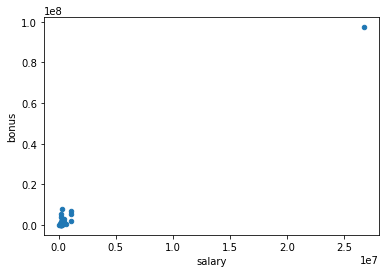

In [279]:
# 检查异常值并剔除
person_df.plot.scatter(x='salary',y='bonus')
plt.show()

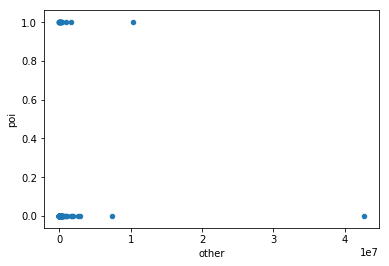

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.000,32083396.000,-27992891.000,1398517.000,NaN,311764000.000,5235198.000,nan,nan,nan,...,48521928.000,42667589.000,False,130322299.000,-7576788.000,26704229.000,nan,nan,309886585.000,434509511.000


In [280]:
person_df[['poi','other']]
person_df.plot.scatter(x='other',y='poi')
plt.show()
person_df.loc[person_df['other']==person_df['other'].max()]
# other的异常值也是total

In [281]:
# 剔除异常值
total=person_df.query('index=="TOTAL"')
person_df.drop(['TOTAL'],inplace=True)

### 需要剔除的特征

In [282]:
# 没有任何数据缺失的对象
print(person_df.dropna(how='any'))
# 完全没有

Empty DataFrame
Columns: [bonus, deferral_payments, deferred_income, director_fees, email_address, exercised_stock_options, expenses, from_messages, from_poi_to_this_person, from_this_person_to_poi, loan_advances, long_term_incentive, other, poi, restricted_stock, restricted_stock_deferred, salary, shared_receipt_with_poi, to_messages, total_payments, total_stock_value]
Index: []

[0 rows x 21 columns]


In [283]:
person_df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


缺失超过一般的特征由于数量不够而且部分数据比如restricted_stock_deferred的对象里完全没有poi，因此容易对最后的结果造成很大的误导故不选作为训练特征。  
保留下的特征有  
email_address                111 non-null object  
exercised_stock_options      102 non-null float64  
expenses                     95 non-null float64  
from_messages                86 non-null float64  
from_poi_to_this_person      86 non-null float64  
from_this_person_to_poi      86 non-null float64  
other                        93 non-null float64  
restricted_stock             110 non-null float64  
salary                       95 non-null float64  
shared_receipt_with_poi      86 non-null float64  
to_messages                  86 non-null float64  
total_payments               125 non-null float64  
total_stock_value            126 non-null float64  

接着移除email_address原因是与结果无关，
剔除的特征有  
email_address                111 non-null object   
deferral_payments            39 non-null float64  
deferred_income              49 non-null float64  
director_fees                17 non-null float64  
loan_advances                4 non-null float64  
long_term_incentive          66 non-null float64  
restricted_stock_deferred    18 non-null float64  


In [284]:
# person_df[['poi','restricted_stock_deferred']].dropna(how='any')
# person_df[['poi','deferred_income']].dropna(how='any')
# 剔除特征
person_df.drop(['email_address','deferral_payments','deferred_income','director_fees','loan_advances','long_term_incentive','restricted_stock_deferred'],axis=1, inplace=True)

In [285]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 14 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
from_messages              86 non-null float64
from_poi_to_this_person    86 non-null float64
from_this_person_to_poi    86 non-null float64
other                      92 non-null float64
poi                        145 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
to_messages                86 non-null float64
total_payments             124 non-null float64
total_stock_value          125 non-null float64
dtypes: bool(1), float64(13)
memory usage: 16.0+ KB


### 新建特征

In [286]:
person_df['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

In [287]:
# 确认有数据的是否都是这四个特征同时拥有数据
print(len(person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')))
# 根据结果一致表明是这样，将这四个特征转化为from_ratio和to_ratio

86


In [288]:
person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']]

,from_this_person_to_poi,from_messages,from_poi_to_this_person,to_messages
ALLEN PHILLIP K,65.000,2195.000,47.000,2902.000
BADUM JAMES P,nan,nan,nan,nan
BANNANTINE JAMES M,0.000,29.000,39.000,566.000
BAXTER JOHN C,nan,nan,nan,nan
BAY FRANKLIN R,nan,nan,nan,nan
BAZELIDES PHILIP J,nan,nan,nan,nan
BECK SALLY W,386.000,4343.000,144.000,7315.000
BELDEN TIMOTHY N,108.000,484.000,228.000,7991.000
BELFER ROBERT,nan,nan,nan,nan
BERBERIAN DAVID,nan,nan,nan,nan


In [289]:
temp_df=person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']].dropna(how='any')
person_df['from_ratio']=temp_df['from_this_person_to_poi']/temp_df['from_messages']
person_df['to_ratio']=temp_df['from_poi_to_this_person']/temp_df['to_messages']

In [290]:
print(person_df[['from_ratio','to_ratio']])

                               from_ratio  to_ratio
ALLEN PHILLIP K                     0.030     0.016
BADUM JAMES P                         nan       nan
BANNANTINE JAMES M                  0.000     0.069
BAXTER JOHN C                         nan       nan
BAY FRANKLIN R                        nan       nan
BAZELIDES PHILIP J                    nan       nan
BECK SALLY W                        0.089     0.020
BELDEN TIMOTHY N                    0.223     0.029
BELFER ROBERT                         nan       nan
BERBERIAN DAVID                       nan       nan
BERGSIEKER RICHARD P                0.000     0.010
BHATNAGAR SANJAY                    0.034     0.000
BIBI PHILIPPE A                     0.200     0.014
BLACHMAN JEREMY M                   0.143     0.010
BLAKE JR. NORMAN P                    nan       nan
BOWEN JR RAYMOND M                  0.556     0.075
BROWN MICHAEL                       0.024     0.009
BUCHANAN HAROLD G                   0.000     0.000
BUTTS ROBERT

In [291]:
# 用中位数来填补空值
person_df[['from_ratio','to_ratio']].fillna(person_df[['from_ratio','to_ratio']].median())

,from_ratio,to_ratio
ALLEN PHILLIP K,0.030,0.016
BADUM JAMES P,0.101,0.026
BANNANTINE JAMES M,0.000,0.069
BAXTER JOHN C,0.101,0.026
BAY FRANKLIN R,0.101,0.026
BAZELIDES PHILIP J,0.101,0.026
BECK SALLY W,0.089,0.020
BELDEN TIMOTHY N,0.223,0.029
BELFER ROBERT,0.101,0.026
BERBERIAN DAVID,0.101,0.026


In [292]:
# 剔除'from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'四个特征
person_df.drop(['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages'],axis=1, inplace=True)

In [293]:
person_df.head()

,bonus,exercised_stock_options,expenses,other,poi,restricted_stock,salary,shared_receipt_with_poi,total_payments,total_stock_value,from_ratio,to_ratio
ALLEN PHILLIP K,4175000.000,1729541.000,13868.000,152.000,False,126027.000,201955.000,1407.000,4484442.000,1729541.000,0.030,0.016
BADUM JAMES P,nan,257817.000,3486.000,nan,False,nan,nan,nan,182466.000,257817.000,nan,nan
BANNANTINE JAMES M,nan,4046157.000,56301.000,864523.000,False,1757552.000,477.000,465.000,916197.000,5243487.000,0.000,0.069
BAXTER JOHN C,1200000.000,6680544.000,11200.000,2660303.000,False,3942714.000,267102.000,nan,5634343.000,10623258.000,nan,nan
BAY FRANKLIN R,400000.000,nan,129142.000,69.000,False,145796.000,239671.000,nan,827696.000,63014.000,nan,nan


### 特征缩放

In [294]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 12 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
other                      92 non-null float64
poi                        145 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
total_payments             124 non-null float64
total_stock_value          125 non-null float64
from_ratio                 86 non-null float64
to_ratio                   86 non-null float64
dtypes: bool(1), float64(11)
memory usage: 13.7+ KB


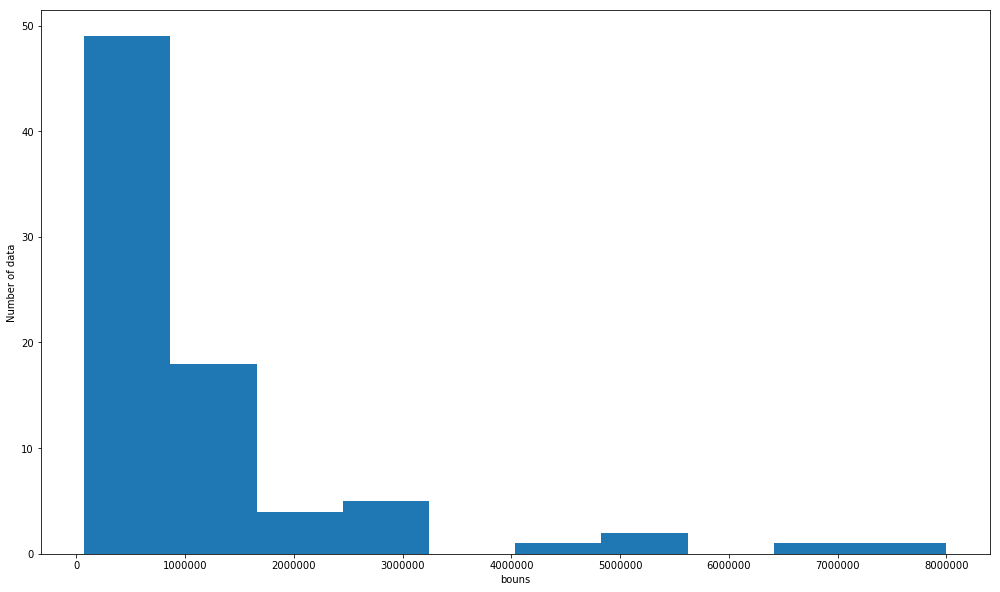

In [295]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['bonus'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('bouns')  
plt.show()

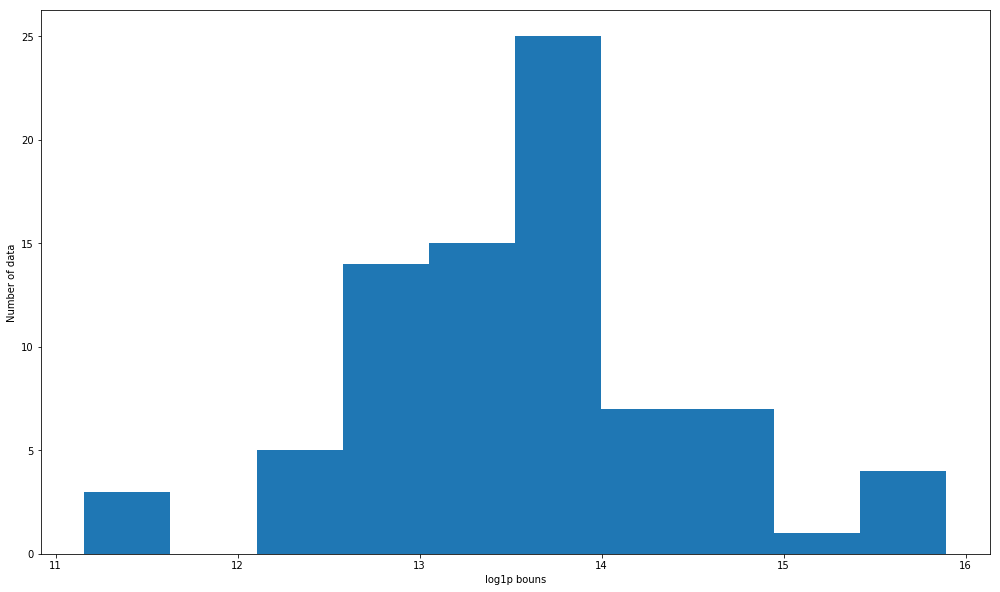

In [296]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(np.log1p(person_df['bonus'].dropna()))
plt.ylabel('Number of data')  
plt.xlabel('log1p bouns')  
plt.show()

In [297]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['bonus']=np.log1p(person_df['bonus'])
person_df[['bonus']].fillna(person_df[['bonus']].median())

,bonus
ALLEN PHILLIP K,15.245
BADUM JAMES P,13.528
BANNANTINE JAMES M,13.528
BAXTER JOHN C,13.998
BAY FRANKLIN R,12.899
BAZELIDES PHILIP J,13.528
BECK SALLY W,13.459
BELDEN TIMOTHY N,15.474
BELFER ROBERT,13.528
BERBERIAN DAVID,13.528


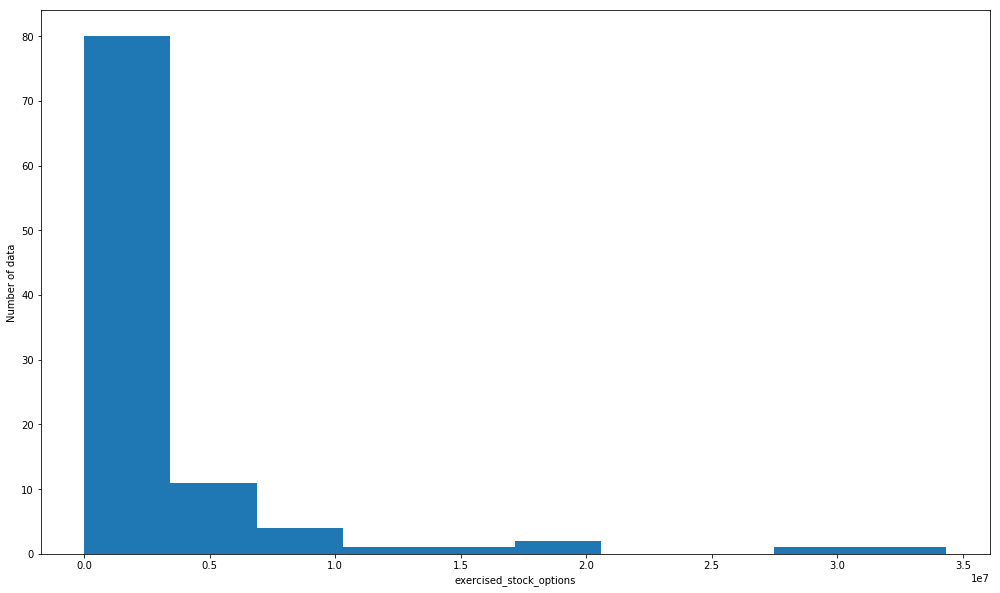

In [298]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['exercised_stock_options'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('exercised_stock_options')  
plt.show()

In [299]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['exercised_stock_options']=np.log1p(person_df['exercised_stock_options'])
person_df[['exercised_stock_options']].fillna(person_df[['exercised_stock_options']].median())

,exercised_stock_options
ALLEN PHILLIP K,14.363
BADUM JAMES P,12.460
BANNANTINE JAMES M,15.213
BAXTER JOHN C,15.715
BAY FRANKLIN R,14.076
BAZELIDES PHILIP J,14.285
BECK SALLY W,14.076
BELDEN TIMOTHY N,13.768
BELFER ROBERT,8.097
BERBERIAN DAVID,14.301


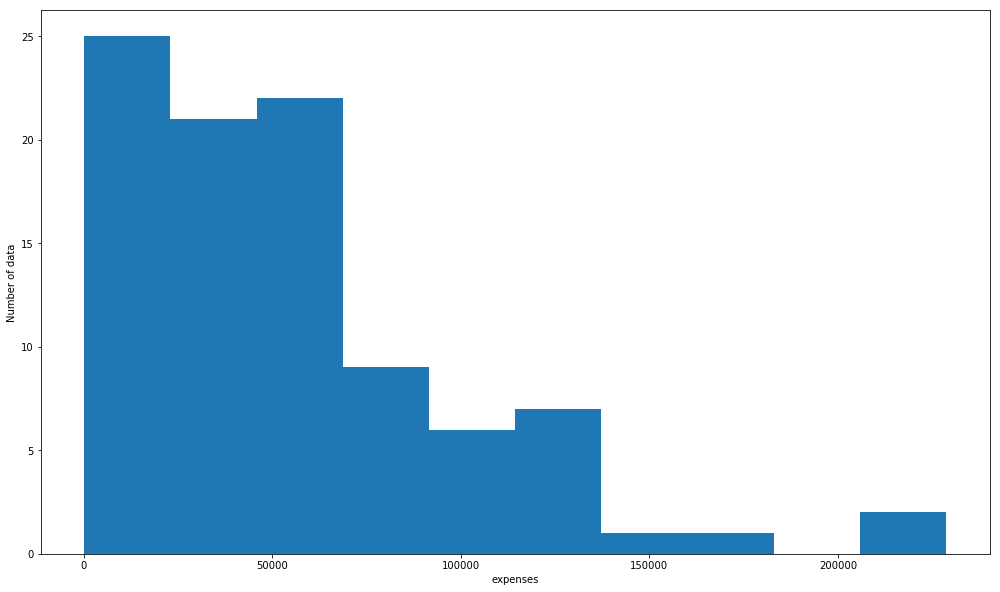

In [300]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['expenses'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('expenses')  
plt.show()

In [301]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['expenses']=np.log1p(person_df['expenses'])
person_df[['expenses']].fillna(person_df[['expenses']].median())

,expenses
ALLEN PHILLIP K,9.537
BADUM JAMES P,8.157
BANNANTINE JAMES M,10.938
BAXTER JOHN C,9.324
BAY FRANKLIN R,11.769
BAZELIDES PHILIP J,10.748
BECK SALLY W,10.523
BELDEN TIMOTHY N,9.762
BELFER ROBERT,10.748
BERBERIAN DAVID,9.384


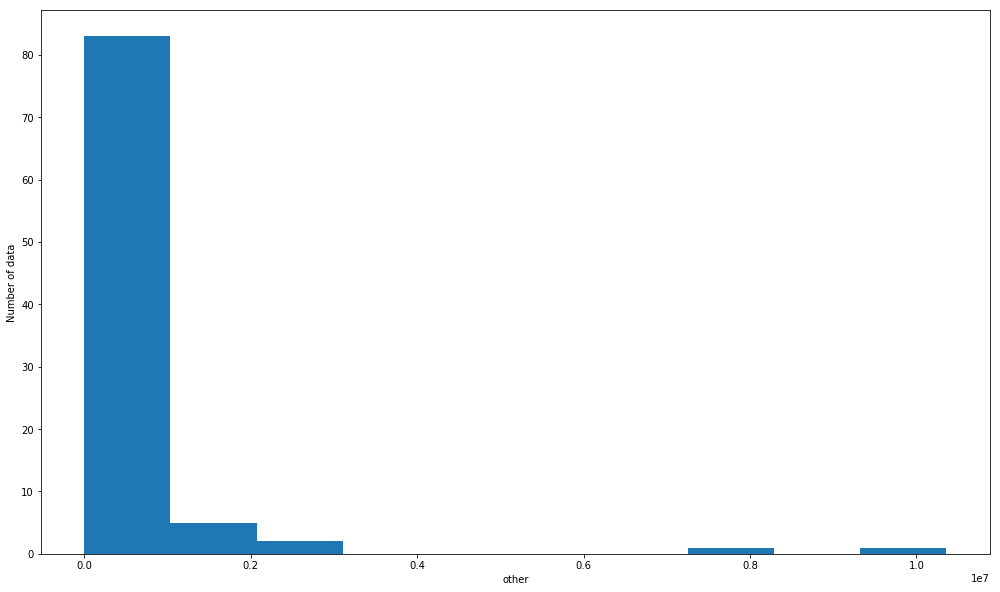

In [302]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['other'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('other')  
plt.show()

In [303]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['other']=np.log1p(person_df['other'])
person_df[['other']].fillna(person_df[['other']].median())

,other
ALLEN PHILLIP K,5.030
BADUM JAMES P,10.859
BANNANTINE JAMES M,13.670
BAXTER JOHN C,14.794
BAY FRANKLIN R,4.248
BAZELIDES PHILIP J,6.774
BECK SALLY W,6.340
BELDEN TIMOTHY N,12.258
BELFER ROBERT,10.859
BERBERIAN DAVID,10.859


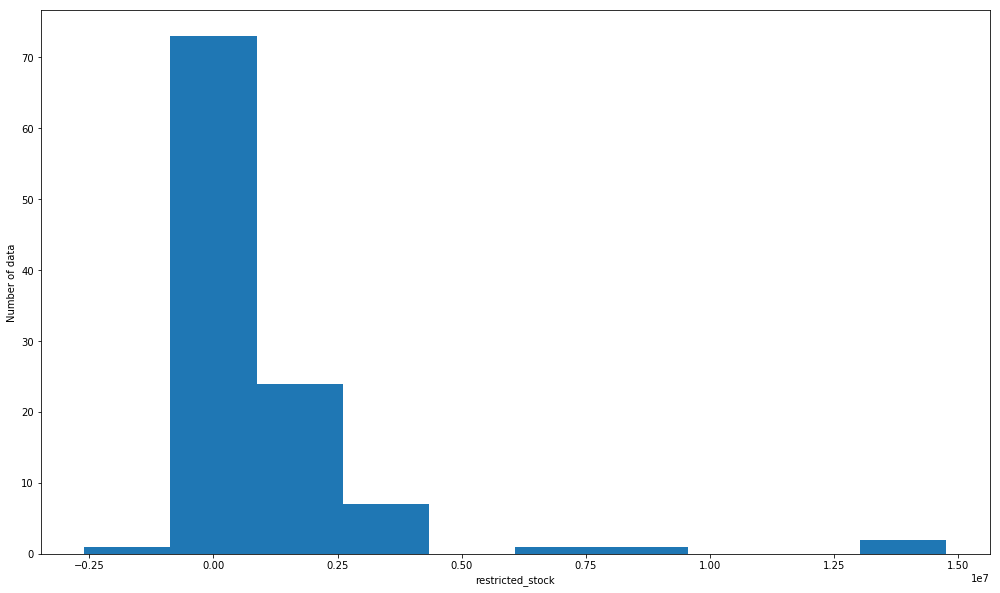

In [304]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['restricted_stock'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('restricted_stock')  
plt.show()

In [305]:
person_df['restricted_stock'].sort_values()

BHATNAGAR SANJAY                -2604490.000
CHAN RONNIE                        32460.000
JAEDICKE ROBERT                    44093.000
PIRO JIM                           47304.000
GILLIS JOHN                        75838.000
MCCARTY DANNY J                    94556.000
DIMICHELE RICHARD G               126027.000
KAMINSKI WINCENTY J               126027.000
CALGER CHRISTOPHER F              126027.000
ALLEN PHILLIP K                   126027.000
BECK SALLY W                      126027.000
DEFFNER JOSEPH M                  141833.000
BAY FRANKLIN R                    145796.000
HAYES ROBERT E                    151418.000
LOWRY CHARLES P                   153686.000
BELDEN TIMOTHY N                  157569.000
MORAN MICHAEL P                   161602.000
DURAN WILLIAM D                   189041.000
BLACHMAN JEREMY M                 189041.000
BUCHANAN HAROLD G                 189041.000
MURRAY JULIA H                    196983.000
REYNOLDS LAWRENCE                 201483.000
CUMBERLAND

In [306]:
# 存在一个负值很奇怪，限制权股票我觉得不太可能是负数有可能是采集出错我将它转化为正数
person_df.loc[person_df.index=='BHATNAGAR SANJAY','restricted_stock']=abs(person_df['restricted_stock']['BHATNAGAR SANJAY'])

In [307]:
person_df['restricted_stock']['BHATNAGAR SANJAY']

2604490.0

In [308]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['restricted_stock']=np.log1p(person_df['restricted_stock'])
person_df[['restricted_stock']].fillna(person_df[['restricted_stock']].median())

,restricted_stock
ALLEN PHILLIP K,11.744
BADUM JAMES P,13.044
BANNANTINE JAMES M,14.379
BAXTER JOHN C,15.187
BAY FRANKLIN R,11.890
BAZELIDES PHILIP J,13.044
BECK SALLY W,11.744
BELDEN TIMOTHY N,11.968
BELFER ROBERT,13.044
BERBERIAN DAVID,13.675


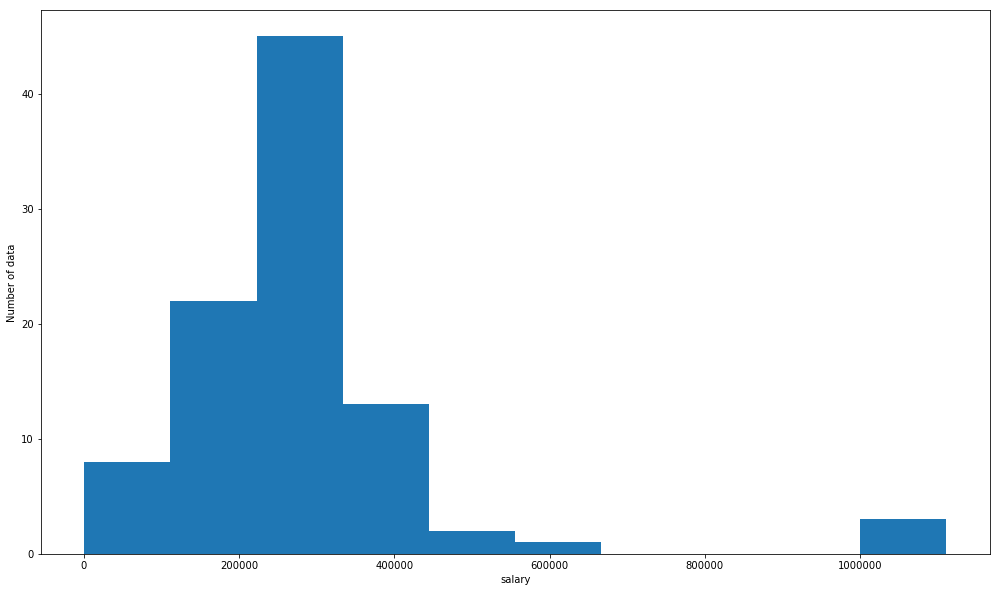

In [309]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['salary'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('salary')  
plt.show()

In [310]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['salary']=np.log1p(person_df['salary'])
person_df[['salary']].fillna(person_df[['salary']].median())

,salary
ALLEN PHILLIP K,12.216
BADUM JAMES P,12.464
BANNANTINE JAMES M,6.170
BAXTER JOHN C,12.495
BAY FRANKLIN R,12.387
BAZELIDES PHILIP J,11.300
BECK SALLY W,12.352
BELDEN TIMOTHY N,12.274
BELFER ROBERT,12.464
BERBERIAN DAVID,12.286


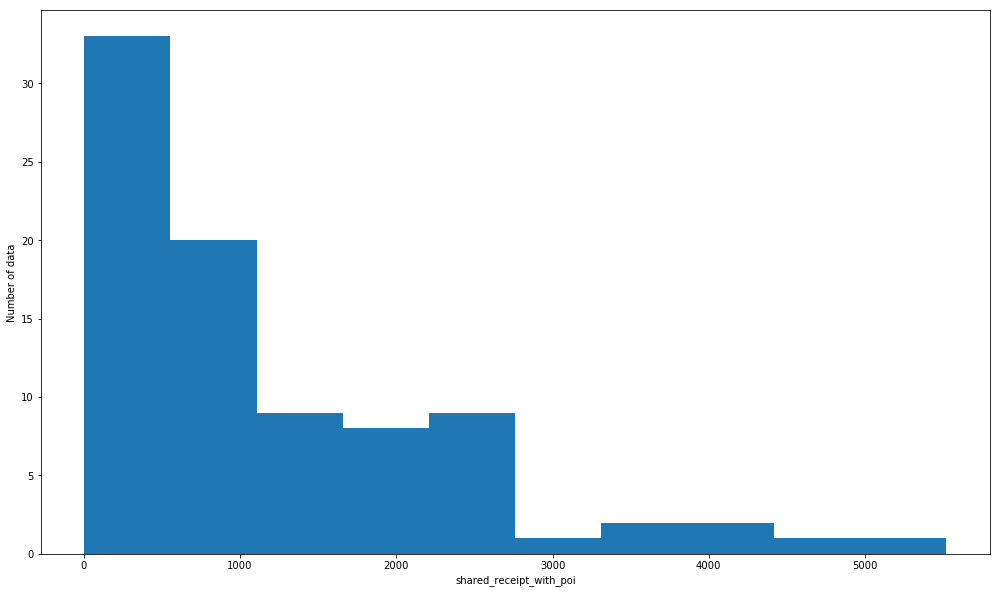

In [311]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['shared_receipt_with_poi'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('shared_receipt_with_poi')  
plt.show()

In [312]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['shared_receipt_with_poi']=np.log1p(person_df['shared_receipt_with_poi'])
person_df[['shared_receipt_with_poi']].fillna(person_df[['shared_receipt_with_poi']].median())

,shared_receipt_with_poi
ALLEN PHILLIP K,7.250
BADUM JAMES P,6.609
BANNANTINE JAMES M,6.144
BAXTER JOHN C,6.609
BAY FRANKLIN R,6.609
BAZELIDES PHILIP J,6.609
BECK SALLY W,7.879
BELDEN TIMOTHY N,8.616
BELFER ROBERT,6.609
BERBERIAN DAVID,6.609


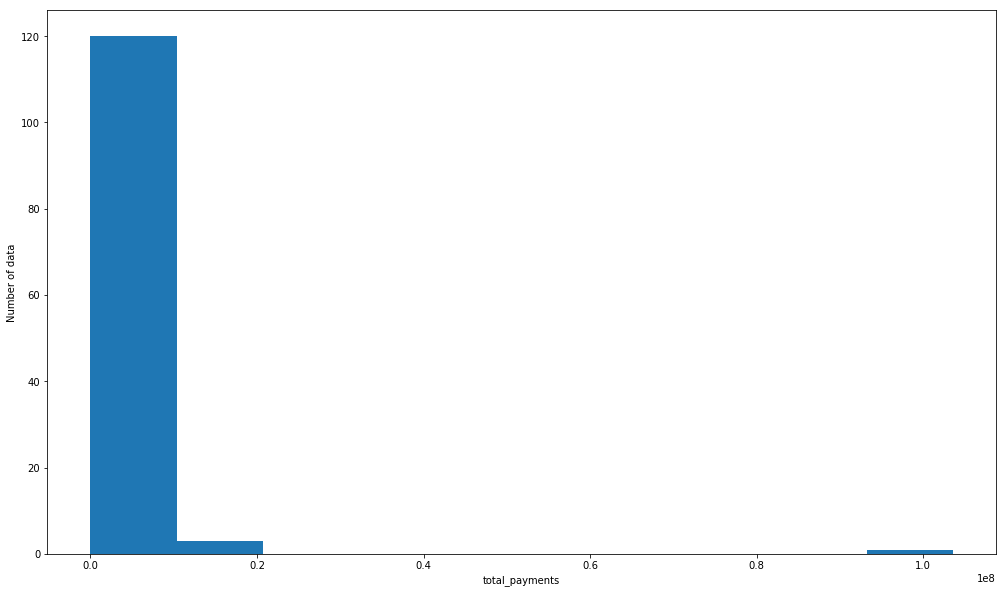

In [313]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_payments'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_payments')  
plt.show()

In [314]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['total_payments']=np.log1p(person_df['total_payments'])
person_df[['total_payments']].fillna(person_df[['total_payments']].median())

,total_payments
ALLEN PHILLIP K,15.316
BADUM JAMES P,12.114
BANNANTINE JAMES M,13.728
BAXTER JOHN C,15.544
BAY FRANKLIN R,13.626
BAZELIDES PHILIP J,13.665
BECK SALLY W,13.784
BELDEN TIMOTHY N,15.521
BELFER ROBERT,11.538
BERBERIAN DAVID,12.339


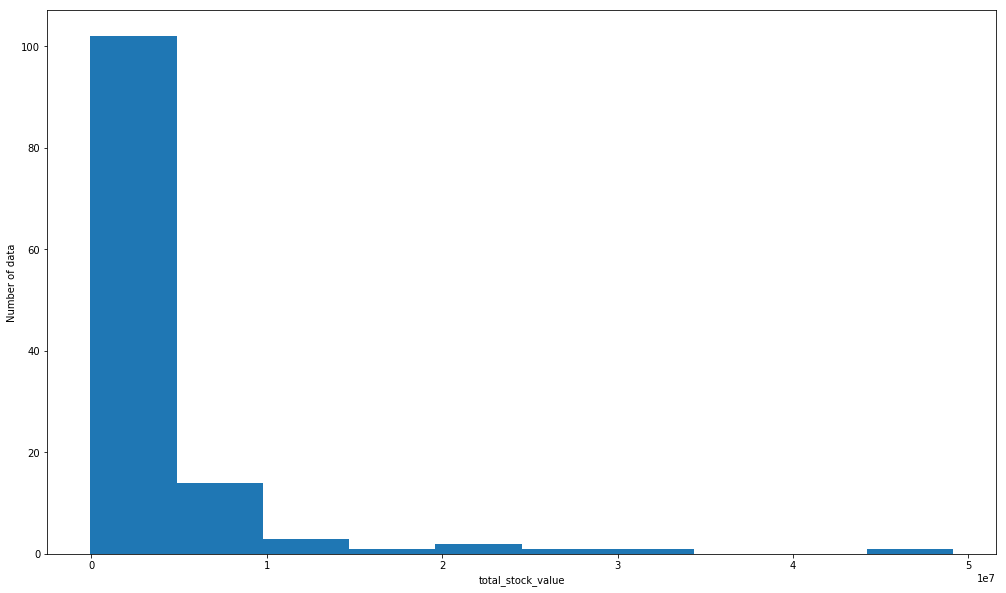

In [315]:
plt.subplots(1,1,figsize=(17,10))
plt.hist(person_df['total_stock_value'].dropna())
plt.ylabel('Number of data')  
plt.xlabel('total_stock_value')  
plt.show()

In [317]:
person_df['total_stock_value'].sort_values()

BELFER ROBERT                     -44093.000
PICKERING MARK R                   28798.000
PIRO JIM                           47304.000
BAY FRANKLIN R                     63014.000
GILLIS JOHN                        85641.000
WHALEY DAVID A                     98718.000
BECK SALLY W                      126027.000
CALGER CHRISTOPHER F              126027.000
WROBEL BRUCE                      139130.000
HAYES ROBERT E                    151418.000
DEFFNER JOSEPH M                  159211.000
FUGH JOHN L                       176378.000
CLINE KENNETH W                   189518.000
YEAP SOON                         192758.000
CUMBERLAND MICHAEL S              207940.000
MORDAUNT KRISTINA M               208510.000
MORAN MICHAEL P                   221141.000
BOWEN JR RAYMOND M                252055.000
BADUM JAMES P                     257817.000
GAHN ROBERT S                     318607.000
FOY JOE                           343434.000
HAYSLETT RODERICK J               346663.000
LEFF DANIE

In [318]:
# 存在一个负值很奇怪，将其做绝对值处理
person_df.loc[person_df.index=='BELFER ROBERT','total_stock_value']=abs(person_df['total_stock_value']['BELFER ROBERT'])

In [319]:
# 将其做对数处理后赋值并对其缺失值补充中位数
person_df['total_stock_value']=np.log1p(person_df['total_stock_value'])
person_df[['total_stock_value']].fillna(person_df[['total_stock_value']].median())

,total_stock_value
ALLEN PHILLIP K,14.363
BADUM JAMES P,12.460
BANNANTINE JAMES M,15.472
BAXTER JOHN C,16.179
BAY FRANKLIN R,11.051
BAZELIDES PHILIP J,14.285
BECK SALLY W,11.744
BELDEN TIMOTHY N,13.921
BELFER ROBERT,10.694
BERBERIAN DAVID,14.729


In [320]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 12 columns):
bonus                      81 non-null float64
exercised_stock_options    101 non-null float64
expenses                   94 non-null float64
other                      92 non-null float64
poi                        145 non-null bool
restricted_stock           109 non-null float64
salary                     94 non-null float64
shared_receipt_with_poi    86 non-null float64
total_payments             124 non-null float64
total_stock_value          125 non-null float64
from_ratio                 86 non-null float64
to_ratio                   86 non-null float64
dtypes: bool(1), float64(11)
memory usage: 18.7+ KB


In [321]:
features_list=['poi','bonus','exercised_stock_options','expenses','other','restricted_stock','salary','shared_receipt_with_poi','total_payments','total_stock_value','from_ratio','to_ratio']

In [328]:
data = featureFormat(person_df.to_dict(orient ='index'), features_list, sort_keys = True)
# person_df.to_dict(orient ='index')

In [329]:
labels, features = targetFeatureSplit(data)

### 选择算法

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [168]:
person_df['exercised_stock_options'].sort_values(ascending=False)

LAY KENNETH L                    34348384.0
HIRKO JOSEPH                     30766064.0
RICE KENNETH D                   19794175.0
SKILLING JEFFREY K               19250000.0
PAI LOU L                        15364167.0
FREVERT MARK A                   10433518.0
DERRICK JR. JAMES V               8831913.0
YEAGER F SCOTT                    8308552.0
DIMICHELE RICHARD G               8191755.0
REDMOND BRIAN L                   7509039.0
BAXTER JOHN C                     6680544.0
HANNON KEVIN P                    5538001.0
OVERDYKE JR JERE C                5266578.0
HORTON STANLEY C                  5210569.0
CHRISTODOULOU DIOMEDES            5127155.0
ELLIOTT STEVEN                    4890344.0
THORN TERENCE H                   4452476.0
WALLS JR ROBERT H                 4346544.0
REYNOLDS LAWRENCE                 4160672.0
LAVORATO JOHN J                   4158995.0
BANNANTINE JAMES M                4046157.0
WHALLEY LAWRENCE G                3282960.0
TAYLOR MITCHELL S               

In [18]:
person_df['exercised_stock_options']['PRENTICE JAMES']+person_df['restricted_stock']['PRENTICE JAMES']

1095040.0

In [19]:
person_df['from_this_person_to_poi']['COLWELL WESLEY']

11.0

In [20]:
person_df['exercised_stock_options']['SKILLING JEFFREY K']

19250000.0

In [21]:
person_df['total_payments'].sort_values(ascending=False)

LAY KENNETH L              103559793.0
FREVERT MARK A              17252530.0
BHATNAGAR SANJAY            15456290.0
LAVORATO JOHN J             10425757.0
SKILLING JEFFREY K           8682716.0
MARTIN AMANDA K              8407016.0
BAXTER JOHN C                5634343.0
BELDEN TIMOTHY N             5501630.0
DELAINEY DAVID W             4747979.0
WHALLEY LAWRENCE G           4677574.0
ALLEN PHILLIP K              4484442.0
SHERRIFF JOHN R              4335388.0
MCMAHON JEFFREY              4099771.0
HAEDICKE MARK E              3859065.0
FALLON JAMES B               3676340.0
KITCHEN LOUISE               3471141.0
MULLER MARK S                3202070.0
HORTON STANLEY C             3131860.0
PAI LOU L                    3123383.0
HUMPHREY GENE E              3100224.0
SHANKMAN JEFFREY A           3038702.0
ECHOLS JOHN B                2692324.0
BOWEN JR RAYMOND M           2669589.0
LEFF DANIEL P                2664228.0
KOPPER MICHAEL J             2652612.0
FASTOW ANDREW S          

In [22]:
len(person_df.query('salary!="NaN"'))

94

In [23]:
# person_df.query('email_address.isnull()')
# person_df['email_address'].describe()
person_df.loc[person_df["email_address"].isnull()]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAZELIDES PHILIP J,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,93750.0,874.0,False,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
BLAKE JR. NORMAN P,NaN,NaN,-113784.0,113784.0,NaN,NaN,1279.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1279.0,NaN
CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,662086.0,-472568.0,NaN,NaN,NaN,NaN,189518.0
CUMBERLAND MICHAEL S,325000.0,NaN,NaN,NaN,NaN,NaN,22344.0,NaN,NaN,NaN,...,275000.0,713.0,False,207940.0,NaN,184899.0,NaN,NaN,807956.0,207940.0
DUNCAN JOHN H,NaN,NaN,-25000.0,102492.0,NaN,371750.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,77492.0,371750.0
FUGH JOHN L,NaN,50591.0,NaN,NaN,NaN,176378.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,50591.0,176378.0


In [24]:
len(person_df.loc[person_df["total_payments"].isnull()])/145.0

0.14482758620689656

In [25]:
person_df.loc[(person_df["total_payments"].isnull())&(person_df["poi"]==True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


In [26]:
len(person_df.loc[person_df['poi']==True])

18

In [27]:
person_df['bonus'].sort_values(ascending=False)

LAVORATO JOHN J                  8000000.0
LAY KENNETH L                    7000000.0
SKILLING JEFFREY K               5600000.0
BELDEN TIMOTHY N                 5249999.0
ALLEN PHILLIP K                  4175000.0
KITCHEN LOUISE                   3100000.0
DELAINEY DAVID W                 3000000.0
WHALLEY LAWRENCE G               3000000.0
MCMAHON JEFFREY                  2600000.0
FALLON JAMES B                   2500000.0
SHANKMAN JEFFREY A               2000000.0
FREVERT MARK A                   2000000.0
RICE KENNETH D                   1750000.0
HICKERSON GARY J                 1700000.0
HANNON KEVIN P                   1500000.0
SHERRIFF JOHN R                  1500000.0
BOWEN JR RAYMOND M               1350000.0
FASTOW ANDREW S                  1300000.0
CALGER CHRISTOPHER F             1250000.0
BAXTER JOHN C                    1200000.0
COLWELL WESLEY                   1200000.0
HAEDICKE MARK E                  1150000.0
MULLER MARK S                    1100000.0
MCCONNELL M

,poi,deferred_income
ALLEN PHILLIP K,False,-3081055.0
BANNANTINE JAMES M,False,-5104.0
BAXTER JOHN C,False,-1386055.0
BAY FRANKLIN R,False,-201641.0
BELDEN TIMOTHY N,True,-2334434.0
BERGSIEKER RICHARD P,False,-485813.0
BLAKE JR. NORMAN P,False,-113784.0
BOWEN JR RAYMOND M,True,-833.0
BUTTS ROBERT H,False,-75000.0
BUY RICHARD B,False,-694862.0


[ 0.90774318  0.09225682]
[4175000.0, 304805.0]
[1200000.0, 1586055.0]
[250000.0, 180250.0]
[1000000.0, 369721.0]
[850000.0, 831809.0]
[1350000.0, 974293.0]
[500000.0, 304805.0]
[750000.0, 175000.0]
[900000.0, 769862.0]
[1250000.0, 375304.0]
[300000.0, 75000.0]
[1000000.0, 350000.0]
[325000.0, 275000.0]
[600000.0, 335349.0]
[3000000.0, 1294981.0]
[800000.0, 484000.0]
[425000.0, 415657.0]
[600000.0, 556416.0]
[1000000.0, 694862.0]
[750000.0, 1105218.0]
[200000.0, 2234774.0]
[2500000.0, 374347.0]
[1300000.0, 1736055.0]
[350000.0, 556416.0]
[2000000.0, 1617011.0]
[850000.0, 375304.0]
[600000.0, 71023.0]
[750000.0, 304805.0]
[1150000.0, 983346.0]
[1500000.0, 1617011.0]
[700000.0, 150000.0]
[1700000.0, 69223.0]
[400000.0, 323466.0]
[1000000.0, 300000.0]
[700000.0, 300000.0]
[800000.0, 602671.0]
[8000000.0, 2035380.0]
[7000000.0, 3600000.0]
[1000000.0, 1387399.0]
[200000.0, 175000.0]
[1100000.0, 554422.0]
[2600000.0, 694862.0]
[1100000.0, 1725545.0]
[400000.0, 125000.0]
[750000.0, 100000.0]


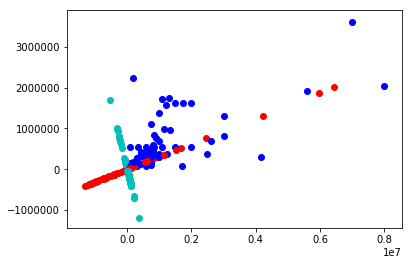

In [37]:
# PCA
data=person_df[['bonus','long_term_incentive']].dropna(how='any')
pca=PCA(n_components=2)
pca.fit(data)
print pca.explained_variance_ratio_
first_pc=pca.components_[0]
second_pc=pca.components_[1]
transformed_data=pca.transform(data)

for ii,jj in zip(transformed_data.tolist(),data.values.tolist()):
    print jj
    plt.scatter(first_pc[0]*ii[0],first_pc[1]*ii[0],color="r")
    plt.scatter(second_pc[0]*ii[1],second_pc[1]*ii[1],color="c")
    plt.scatter(jj[0],jj[1],color="b")
plt.show()
